In [3]:
#1
import pandas as pd

In [4]:
import numpy as np

In [5]:
 import matplotlib.pyplot as plt

In [6]:
#2 Read data from a flat file
cancer_df = pd.read_csv("_cancer_dataset_uae.csv")

In [7]:
#3 show data
cancer_df

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193


In [8]:
#4 Fill in missing data with zeros

cancer_df.fillna(0, inplace=True)


In [9]:
#6 show number of rows,number of columns size of the sample
print(systematic_sample.shape)

NameError: name 'systematic_sample' is not defined

In [ ]:
# Create a systematic sample
sample_size = 150
step = len(cancer_df) // sample_size
systematic_sample = cancer_df.iloc[::step].head(sample_size)

In [ ]:
#7 display the first 5 rows
cancer_df.head()

In [ ]:
#8 show the last 5 rows
cancer_df.tail()

In [ ]:
#9 Display selected columns: Gender, Age, Cancer_Type, and Outcome
cancer_df[['Gender','Age','Cancer_Type','Outcome']]

In [ ]:
# 10 Display the number of patients in each cancer type
cancer_df.groupby('Cancer_Type') ['Patient_ID']

In [10]:
# 11 describe the statistics measures for AGE,WEIGHT,HEIGHT columns MEAN
cancer_df['Age'].mean()


np.float64(53.5397)

In [11]:
#12
cancer_df['Weight'].mean()


np.float64(69.55)

In [12]:
#13
cancer_df['Height'].mean()


np.float64(169.3475)

In [13]:
cancer_df['Cancer_Type'].mode()[0]


'Leukemia'

In [14]:
cancer_df['Age'].mode()[0]


np.int64(34)

In [15]:
cancer_df['Gender'].mode()[0]


'Female'

In [16]:
#14 Interquartile Range for Age it  shows 50% of patients have ages between 40 and 76 years old.
#The IQR = 36 shows there’s a wide range of patient ages, meaning cancer affects both young and older adults in the dataset
Q1 = cancer_df['Age'].quantile(0.25)
Q3 = cancer_df['Age'].quantile(0.75)
IQR = Q3 - Q1
print("IQR for Age:", IQR)

IQR for Age: 36.0


In [17]:
#15  Calculates skewness using the manual formula: the value 0.026 is very close to 0, meaning the Age distribution is symmetric.
#there’s no strong skew toward one age group.
mean_age = cancer_df['Age'].mean()
median_age = cancer_df['Age'].median()
std_age = cancer_df['Age'].std()

skewness_formula = (mean_age - median_age) / std_age
print("Skewness (Manual Formula):", skewness_formula)

Skewness (Manual Formula): 0.02600046100165903


In [18]:
# 16 Find the number of patient in all cancer type ( frequency table)
cancer_df['Cancer_Type'].value_counts()


Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

In [19]:
sample_size = 150
random_sample = cancer_df.sample(n=sample_size, replace=False, random_state=42)



In [20]:
print("Random sample created:", random_sample.shape)

Random sample created: (150, 20)


In [21]:
THE DEPENEDENT VARIABLE OUTCOME

SyntaxError: invalid syntax (1811335387.py, line 1)

In [22]:
# Frequency distribution for Outcome
outcome_counts = random_sample['Outcome'].value_counts()
outcome_percent = random_sample['Outcome'].value_counts(normalize=True) * 100
print("Frequency Table for Outcome")
print("-------------------------------")
print(outcome_counts)
print("\n Percentage Distribution:")
print(outcome_percent.round(2))


Frequency Table for Outcome
-------------------------------
Outcome
Under Treatment    73
Recovered          64
Deceased           13
Name: count, dtype: int64

 Percentage Distribution:
Outcome
Under Treatment    48.67
Recovered          42.67
Deceased            8.67
Name: proportion, dtype: float64


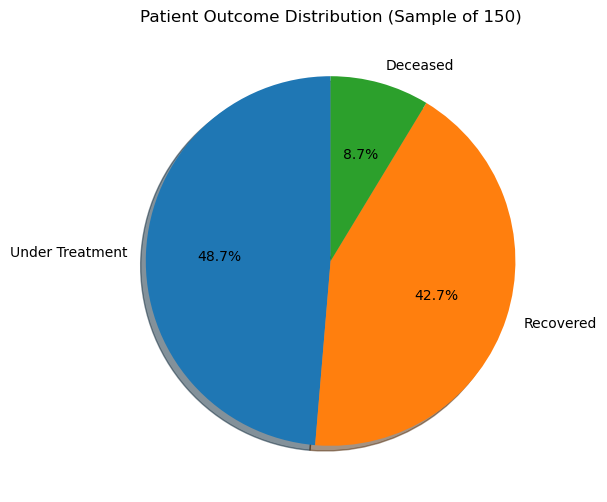

In [23]:


# Pie chart for Outcome
plt.figure(figsize=(6,6))
plt.pie(outcome_counts,
        labels=outcome_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True)
plt.title('Patient Outcome Distribution (Sample of 150)')
plt.show()


In [24]:
#Frequency distribution for Death_Date
#count how many times each unique value appears
#show us how many patients have died (with a recorded death date)
#137 alive, 13 deceased, Sample size = 150 patients

death_counts = random_sample['Death_Date'].value_counts()
death_percent = random_sample['Death_Date'].value_counts(normalize=True) * 100

print("📊 Frequency Table for Death_Date")
print("----------------------------------")
print(death_counts)
print("\n📈 Percentage Distribution:")
print(death_percent.round(2))

📊 Frequency Table for Death_Date
----------------------------------
Death_Date
0                      137
2016-11-04 00:00:00      1
2019-06-04 00:00:00      1
2024-08-29 00:00:00      1
2022-06-28 00:00:00      1
2020-06-04 00:00:00      1
2020-12-05 00:00:00      1
2022-04-10 00:00:00      1
2024-03-08 00:00:00      1
2022-11-19 00:00:00      1
2017-01-18 00:00:00      1
2023-01-11 00:00:00      1
2021-01-07 00:00:00      1
2018-10-04 00:00:00      1
Name: count, dtype: int64

📈 Percentage Distribution:
Death_Date
0                      91.33
2016-11-04 00:00:00     0.67
2019-06-04 00:00:00     0.67
2024-08-29 00:00:00     0.67
2022-06-28 00:00:00     0.67
2020-06-04 00:00:00     0.67
2020-12-05 00:00:00     0.67
2022-04-10 00:00:00     0.67
2024-03-08 00:00:00     0.67
2022-11-19 00:00:00     0.67
2017-01-18 00:00:00     0.67
2023-01-11 00:00:00     0.67
2021-01-07 00:00:00     0.67
2018-10-04 00:00:00     0.67
Name: proportion, dtype: float64


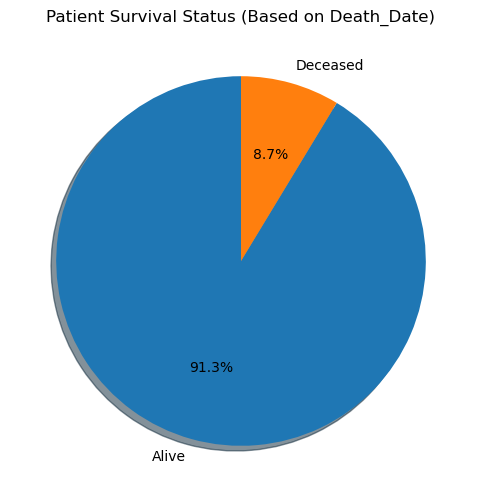

In [25]:
# Group the data into "Alive" and "Deceased"
#analysis of the variable Death_Date shows that 92% of patients are still alive (no death date recorded), while 8% are deceased.
alive = (random_sample['Death_Date'] == 0).sum()
deceased = (random_sample['Death_Date'] != 0).sum()

labels = ['Alive', 'Deceased']
values = [alive, deceased]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Patient Survival Status (Based on Death_Date)')
plt.show()

In [26]:
#THE DEPENEDENT VARIABLE Cause_of_Death

In [27]:
# Frequency distribution for Cause_of_Death
cause_counts = random_sample['Cause_of_Death'].value_counts()
cause_percent = random_sample['Cause_of_Death'].value_counts(normalize=True) * 100

print("Frequency Table for Cause_of_Death")
print("-------------------------------------")
print(cause_counts)
print("\n Percentage Distribution:")
print(cause_percent.round(2))

Frequency Table for Cause_of_Death
-------------------------------------
Cause_of_Death
0                137
Cancer             8
Complications      5
Name: count, dtype: int64

 Percentage Distribution:
Cause_of_Death
0                91.33
Cancer            5.33
Complications     3.33
Name: proportion, dtype: float64


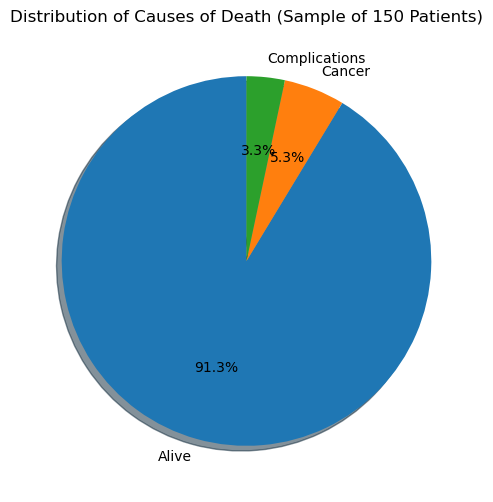

In [28]:
# Replace 0 with 'Alive' for clarity
random_sample['Cause_of_Death_Clean'] = random_sample['Cause_of_Death'].replace(0, 'Alive')

# Count again
cause_counts_clean = random_sample['Cause_of_Death_Clean'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(cause_counts_clean, labels=cause_counts_clean.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Causes of Death (Sample of 150 Patients)')
plt.show()

In [29]:


# Desc_stat function
def Desc_stat(ds, var):
    mean = ds[var].mean()
    median = ds[var].median()
    mode_val = ds[var].mode()[0]
    minimum = ds[var].min()
    maximum = ds[var].max()
    range_val = maximum - minimum
    std_dev = ds[var].std()
    variance = ds[var].var()
    skew_val = ds[var].skew()
    kurtosis_val = ds[var].kurt()
    count = ds[var].count()

    Quart = [
        ds[var].quantile(0),
        ds[var].quantile(0.25),
        ds[var].quantile(0.50),
        ds[var].quantile(0.75),
        ds[var].quantile(1),
        ds[var].quantile(0.75) - ds[var].quantile(0.25)
    ]

    summary = {
        "Average": mean,
        "Median": median,
        "Mode": mode_val,
        "Minimum": minimum,
        "Maximum": maximum,
        "Range": range_val,
        "Std Dev": std_dev,
        "Variance": variance,
        "Skewness": skew_val,
        "Kurtosis": kurtosis_val,
        "Minimum (Q0)": Quart[0],
        "25th Percentile (Q1)": Quart[1],
        "50th Percentile (Q2)": Quart[2],
        "75th Percentile (Q3)": Quart[3],
        "Maximum (Q4)": Quart[4],
        "Inter Quartile Range": Quart[5],
        "Count": count
    }

    return summary



In [30]:
# Filter data (Age > 50)
filtered = cancer_df[cancer_df['Age'] > 50].reset_index(drop=True)

# Take a systematic sample (every 5th row)
systematic_sample = filtered.iloc[::5]

# Apply Desc_stat to Outcome
outcome_counts = systematic_sample['Outcome'].value_counts()
outcome_percent = systematic_sample['Outcome'].value_counts(normalize=True) * 100

print("Frequency Table for Outcome:")
print(outcome_counts)
print("\nPercentage Distribution:")
print(outcome_percent.round(2))



Frequency Table for Outcome:
Outcome
Recovered          519
Under Treatment    434
Deceased           124
Name: count, dtype: int64

Percentage Distribution:
Outcome
Recovered          48.19
Under Treatment    40.30
Deceased           11.51
Name: proportion, dtype: float64


In [31]:
#Descriptive Stat for all columns
cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,53.5397,20.757324,18.0,36.0,53.0,72.0,89.0
Weight,10000.0,69.5500,14.933339,18.0,60.0,70.0,80.0,122.0
Height,10000.0,169.3475,10.070118,131.0,163.0,169.0,176.0,208.0


In [43]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

6. Visualize the dependent variable by the Graph/Chart of the following using Python Program: 
a. Scatter plot 
b. Box Plot 
c. Histogram 
d. Heat Map 

In [33]:
import pandas as pd
df = pd.read_csv('_cancer_dataset_uae.csv') 

# Convert Cancer Stage to numbers
stage_map = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
df['Cancer_Stage_Num'] = df['Cancer_Stage'].map(stage_map)

# Create df_clean (removing missing values)
df_clean = df.dropna(subset=['Age', 'Cancer_Stage_Num'])

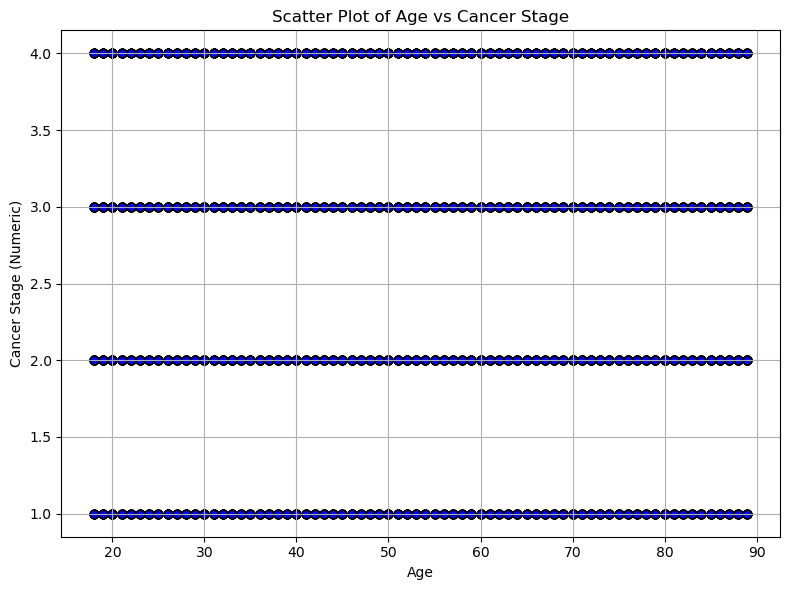

In [41]:
# a. Scatter plot 
# scatter plot for Age Vs Cancer Stage.

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Age'], df_clean['Cancer_Stage_Num'], color='blue', edgecolor='black')
plt.title('Scatter Plot of Age vs Cancer Stage')
plt.xlabel('Age')
plt.ylabel('Cancer Stage (Numeric)')
plt.grid(True)
plt.tight_layout()
plt.show()




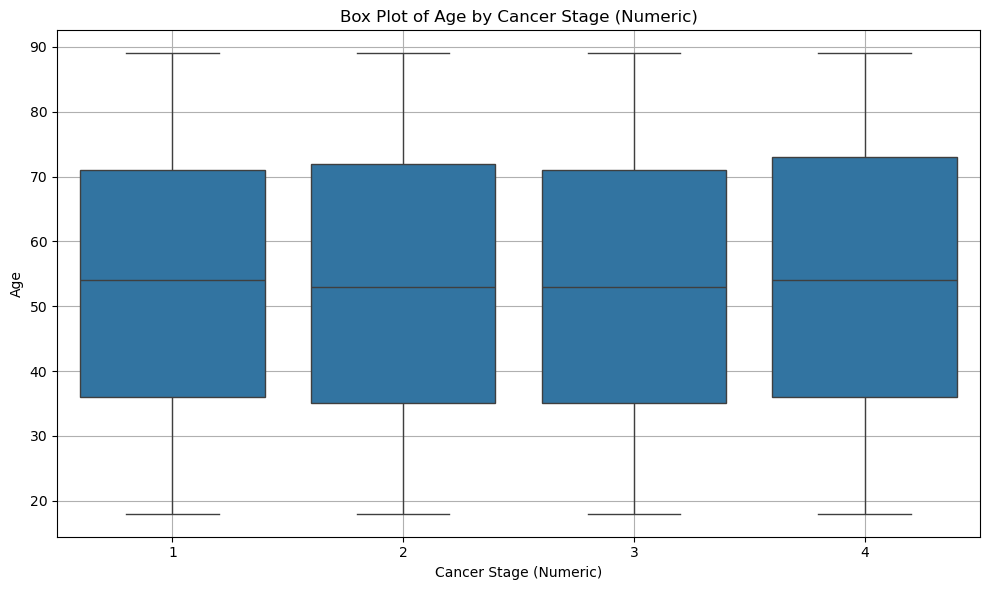

In [35]:
# b. Box Plot 
# box plots of Age by Cancer Stage.

stage_map = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
df['Cancer_Stage_Num'] = df['Cancer_Stage'].map(stage_map)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer_Stage_Num', y='Age', data=df)
plt.title('Box Plot of Age by Cancer Stage (Numeric)')
plt.ylabel('Age')
plt.xlabel('Cancer Stage (Numeric)')
plt.grid(True)
plt.tight_layout()
plt.show()

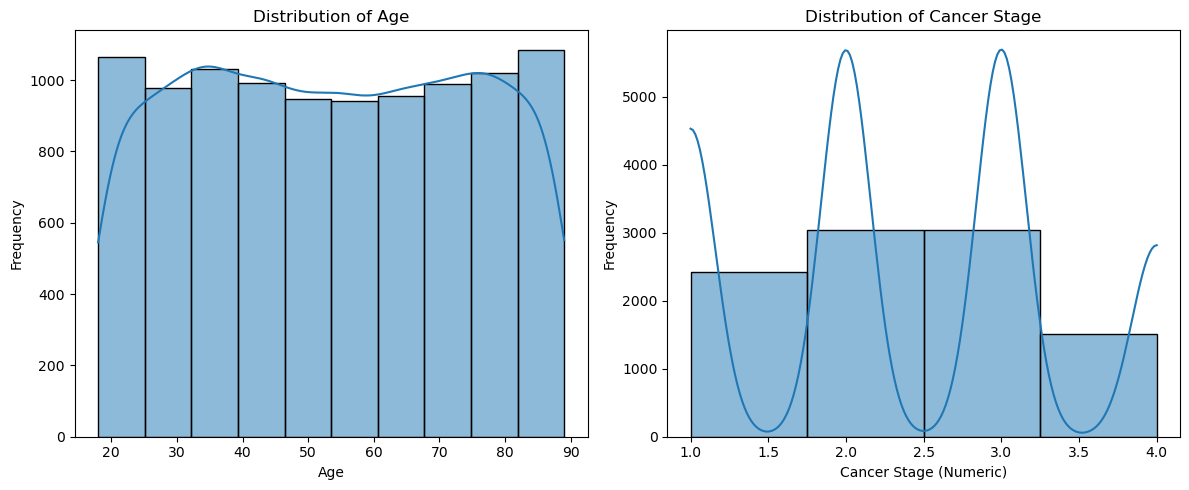

Skewness of Age: 0.00
Skewness of Cancer Stage: 0.11
The Age distribution is right-skewed (positively skewed).
The Cancer Stage distribution is right-skewed (positively skewed).


In [36]:
#c. Histogram 
# Histogram of Distribution of Age and Distribution of Cancer Stage.

stage_map = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
df['Cancer_Stage_Num'] = df['Cancer_Stage'].map(stage_map)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Cancer Stage (Numeric)
plt.subplot(1, 2, 2)
sns.histplot(df['Cancer_Stage_Num'], bins=4, kde=True)
plt.title('Distribution of Cancer Stage')
plt.xlabel('Cancer Stage (Numeric)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Analyze skewness
age_skew = df['Age'].skew()
stage_skew = df['Cancer_Stage_Num'].skew()

print(f"Skewness of Age: {age_skew:.2f}")
print(f"Skewness of Cancer Stage: {stage_skew:.2f}")

if age_skew > 0:
    print("The Age distribution is right-skewed (positively skewed).")
elif age_skew < 0:
    print("The Age distribution is left-skewed (negatively skewed).")
else:
    print("The Age distribution is approximately symmetric.")

if stage_skew > 0:
    print("The Cancer Stage distribution is right-skewed (positively skewed).")
elif stage_skew < 0:
    print("The Cancer Stage distribution is left-skewed (negatively skewed).")
else:
    print("The Cancer Stage distribution is approximately symmetric.")


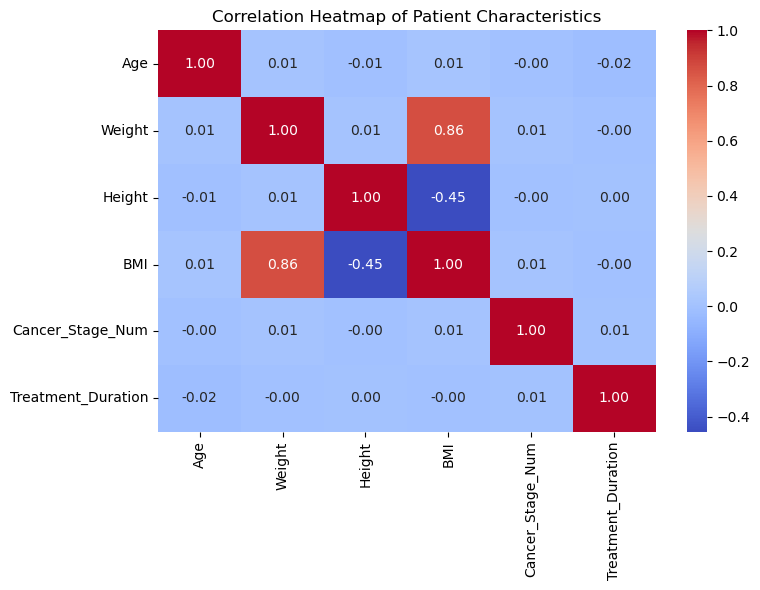

Strongest correlation:
Weight  BMI    0.863794
dtype: float64

Weakest correlation:
BMI  Height   -0.454761
dtype: float64


In [48]:
# d. Heat Map 
# Heatmap of Patient Characteristics


import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('_cancer_dataset_uae.csv')

# Convert Cancer Stage to numeric
stage_map = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}
df['Cancer_Stage_Num'] = df['Cancer_Stage'].map(stage_map)

# Convert date columns to datetime
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'], errors='coerce')
df['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'], errors='coerce')

# Calculate Treatment Duration in days
df['Treatment_Duration'] = (df['Treatment_Start_Date'] - df['Diagnosis_Date']).dt.days

# Calculate BMI = Weight / (Height/100)^2
df['BMI'] = df['Weight'] / (df['Height']/100)**2

# Select Numeric Columns 
numeric_data = df[['Age', 'Weight', 'Height', 'BMI', 'Cancer_Stage_Num', 'Treatment_Duration']].dropna()


# Use Spearman to detect both linear and non-linear relationships
correlation_matrix = numeric_data.corr(method='spearman')

# Plot Heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Patient Characteristics')
plt.tight_layout()
plt.show()

# Identify Strongest & Weakest Correlations
sorted_corr = correlation_matrix.unstack().sort_values(ascending=False)
strongest = sorted_corr[(sorted_corr < 1.0)].head(1)
weakest = sorted_corr.tail(1)

print("Strongest correlation:")
print(strongest)

print("\nWeakest correlation:")
print(weakest)